In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Gloabal Variable

In [3]:
data_path = "/content/drive/MyDrive/Colab Notebooks/Github/IndividualProject-webtoonRecommendation/DeveloperAcademy-NC2-WebtoonRecommendation/MachineLearning/data/"
private_info_path = "/content/drive/MyDrive/Colab Notebooks/Github/IndividualProject-webtoonRecommendation/DeveloperAcademy-NC2-WebtoonRecommendation/MachineLearning/privateinfo.txt"
nw_url = 'https://comic.naver.com/webtoon/'
kw_url = 'https://page.kakao.com/main?categoryUid=10&subCategoryUid=1002'
login_id = ''
login_pw = ''

with open(private_info_path, "r") as f:
    login_id = f.readline()
    login_pw = f.readline()

# download library

In [4]:
!pip install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

!pip install konlpy

!pip install mahotas

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.2 MB 5.0 MB/s 
     |████████████████████████████████| 384 kB 73.2 MB/s 
     |████████████████████████████████| 140 kB 72.4 MB/s 
     |████████████████████████████████| 58 kB 8.2 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.12 which is incompatible.
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Ign:

# myUtil

In [19]:
import pandas as pd
import pickle as pk
from urllib import request
from PIL import Image
import os


class ut():
    # 모아둔 정보로 CSV 파일 생성하기
    @staticmethod
    def make_csv(filename, ti):
        ti.to_csv(filename, encoding='utf-8-sig')

    # CSV 파일이 있다면 가져오기
    @staticmethod
    def get_from_csv(filename):
        return pd.read_csv(filename, encoding='utf-8-sig')

    # CSV 파일을 지우기
    @staticmethod
    def delete_csv(filename):
        if os.path.isfile(filename):
            os.path.isdir
            os.remove(filename)

    # 특정 데이터를 파일에 저장해놓기
    @staticmethod
    def save_data(filename, data):
        with open(filename, 'wb') as f:
            pk.dump(data, f)

    # 저장해둔 데이터 불러오기
    @staticmethod
    def load_data(filename):
        with open(filename, 'rb') as f:
            return pk.load(f)

    # 이미지 다운받아서 저장하기
    @staticmethod
    def save_images(urls):
        if not os.path.isdir(data_path+"images"):
            os.makedirs(data_path+"images")
            os.makedirs(data_path+"resized_images")
            print("--images downloading start--")
            for idx, url in enumerate(urls):
                print("\r" + str(idx + 1) + "/" + str(len(urls)), end="")
                img_name = data_path+"images/thumbnail" + str(idx) + ".jpg"
                request.urlretrieve(url, img_name)
                resized_img_name = data_path+"resized_images/thumbnail" + str(idx) + ".jpg"
                img = Image.open(img_name).convert('RGB')
                img.save(resized_img_name, 'JPEG', qualty=85)

            print()
            print("--images downloading end--")
        else:
            print("--images already exist--")

    # 이미지에서 추출한 스타일 이미지 저장하기
    @staticmethod
    def save_style_images(imgs):
        if not os.path.isdir(data_path+"style_images"):
            os.makedirs(data_path+"style_images")
            for idx, img in enumerate(imgs):
                img = Image.fromarray((img * 255).astype(np.uint8))
                img_name = data_path+"style_images/thumbnail" + str(idx) + ".jpg"
                img.save(img_name, 'JPEG')

     # 이미지 크기 바꾸기
    @staticmethod
    def resize_img(img_path):
        max_dim = 150

        img = tf.io.read_file(img_path)
        img = tf.image.decode_image(img, channels=3)
        img = tf.image.convert_image_dtype(img, tf.float32)
        img = np.squeeze(img)

        shape = tf.cast(tf.shape(img)[:-1], tf.float32)
        long_dim = max(shape)
        scale = max_dim / long_dim

        new_shape = tf.cast(shape * scale, tf.int32)
        img = tf.image.resize(img, new_shape)
        img = img[tf.newaxis, :]

        return img

    # 폴더로부터 이미지 가져오기
    @staticmethod
    def get_imges():
        thumbnails_size = len(td.total_data['thumbnail'])
        images = []
        print("--images loading from folder start--")
        for i in range(thumbnails_size):
            print("\r" + str(i + 1) + "/" + str(thumbnails_size), end="")
            images.append(ut.resize_img((data_path+"images/thumbnail" + str(i) + ".jpg")))
        print()
        print("--images loading from folder end--")
        return images
        


# totalData

In [6]:
import pandas as pd


class td:
    # 전체 정보를 저장할 변수
    total_data = pd.DataFrame({
        "id": [],
        "cluster_story": [],
        "cluster_story_in_genre": [],
        "cluster_style": [],
        "cluster_story_group": [],
        "cluster_story_group_in_genre": [],
        "cluster_style_group": [],
        "thumbnail": [],
        "title": [],
        "author": [],
        "day": [],
        "genre": [],
        "story": [],
        "platform": [],
        "url": [],
    })

    # 각 클러스터별 핵심 단어를 저장할 변수
    cluster_details = pd.DataFrame({
        "genre": [],
        "cluster_num": [],
        "words": [],
    })

    # 카테고리 목록
    categories = []

    @staticmethod
    def make_total_data(wd):
        my_total_data = pd.DataFrame({
            "id": [],
            "thumbnail": [],
            "title": [],
            "author": [],
            "day": [],
            "genre": [],
            "story": [],
            "platform": [],
            "url": [],
        })

        my_total_data['id'] = wd.id_list
        my_total_data['thumbnail'] = wd.thumbnail_list
        my_total_data['title'] = wd.title_list
        my_total_data['author'] = wd.author_list
        my_total_data['day'] = wd.day_list
        my_total_data['genre'] = wd.genre_list
        my_total_data['story'] = wd.story_list
        my_total_data['platform'] = wd.platform_list
        my_total_data['url'] = wd.url_list

        my_total_data = my_total_data.drop_duplicates(['title'])
        my_total_data.set_index('id', inplace=True)

        return my_total_data

    @staticmethod
    def merge_total_data(tds):
        td.total_data = pd.concat(tds)
        first_td_len = len(tds[0])
        td.total_data['id'] = [i for i in range(len(td.total_data))]
        td.total_data.set_index('id', inplace=True)
        td.total_data = td.total_data.loc[:, ~td.total_data.columns.str.contains('^Unnamed')]

    @staticmethod
    def save_category():
        td.categories = list(set(td.total_data['genre']))
        print("\n<웹툰 카테고리 종류 및 개수>")
        print("전체: " + str(len(td.total_data)))
        for genre in td.categories:
            print(genre + ": " + str(len(td.total_data.index[td.total_data['genre'] == genre])))
        print()

    @staticmethod
    def title_to_index(title):
        return td.total_data.index[td.total_data['title'] == title][0]

    @staticmethod
    def index_to_title(index):
        return td.total_data['title'][index]


# webtoonData

In [7]:
class WebtoonData:
    def __init__(self):
        self.id_list = []
        self.thumbnail_list = []
        self.title_list = []
        self.author_list = []
        self.day_list = []
        self.genre_list = []
        self.story_list = []
        self.platform_list = []
        self.url_list = []

# myWebCrawling

In [8]:
from selenium import webdriver
 
#Colab에선 웹브라우저 창이 뜨지 않으므로 별도 설정한다.
 
options = webdriver.ChromeOptions()
options.add_argument('--headless')        # Head-less 설정
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

In [9]:
import pandas as pd
import requests
import datetime
from bs4 import BeautifulSoup as bs
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver import ActionChains
from time import sleep
import os.path


class MyWebCrawling:
    def get_weekday_info(self):
        driver = webdriver.Chrome('chromedriver', options=options)
        html = requests.get(self.nw_url+"weekday").text
        soup = bs(html, 'html.parser')
        title = soup.find_all('a', {'class': 'title'})
        driver.get(self.nw_url+"weekday")

        part_wd = WebtoonData()
        # 각각의 웹툰 정보 수집 시작
        idx = 0
        for i in range(len(title)):
            sleep(0.5)
            print("\rprocess(weekday)): " + str(i + 1) + " / " + str(len(title)), end="")
            # 월요일 첫 번째 웹툰부터 순서대로 클릭
            page = driver.find_elements(By.CLASS_NAME, "title")
            page[i].click()

            # 이동한 페이지 주소 읽고 파싱
            html = driver.page_source
            soup = bs(html, 'html.parser')

            # 요일 수집
            day = soup.find_all('ul', {'class': 'category_tab'})
            day = day[0].find('li', {'class': 'on'}).text[0:1]

            # 요일 두 개 이상이면 요일만 추가함
            current_title = title[i].text
            if current_title in part_wd.title_list:
                part_wd.day_list[part_wd.title_list.index(current_title)] += ', ' + day
                driver.back()
                continue

            # 나머지 정보 수집
            image_url = soup.find('div', {'class': 'thumb'}).find('a').find('img')
            image_url = image_url['src']
            author = soup.find('span', {'class': 'wrt_nm'}).text[8:]
            author = author.replace(' / ', ', ')
            genre = soup.find('span', {'class': 'genre'}).text.split(", ")
            story = soup.find('div', {'class': 'detail'}).find('p').text

            # 리스트에 추가
            part_wd.id_list.append(idx)
            part_wd.thumbnail_list.append(image_url)
            part_wd.title_list.append(current_title)
            part_wd.author_list.append(author)
            part_wd.day_list.append(day)
            if genre[1] == "무협/사극":
                part_wd.genre_list.append("무협")
            else:
                part_wd.genre_list.append(genre[1])
            part_wd.story_list.append(story)
            part_wd.platform_list.append("네이버")
            part_wd.url_list.append(driver.current_url)

            # 뒤로 가기
            idx += 1
            driver.back()
            sleep(0.5)
        return part_wd

    def get_finish_info(self):
        driver = webdriver.Chrome('chromedriver', options=options)
        html = requests.get(self.nw_url + "finish").text
        soup = bs(html, 'html.parser')
        thumb = soup.find_all('div', {'class': 'thumb'})
        driver.get(self.nw_url + "finish")

        part_wd = WebtoonData()
        # 웹툰 정보 수집 시작
        idx = 0
        for i in range(len(thumb)):
            sleep(0.5)
            print("\rprocess(finish)): " + str(i + 1) + " / " + str(len(thumb)), end="")
            # 첫 번째 웹툰부터 순서대로 클릭
            page = driver.find_elements(By.CLASS_NAME, "thumb")[1:]
            page[i].click()

            # 이동한 페이지 주소 읽고 파싱
            html = driver.page_source
            soup = bs(html, 'html.parser')

            # 정보 수집
            day = "완결"
            title = soup.find('span', {'class': 'title'}).text
            image_url = soup.find('div', {'class': 'thumb'}).find('a').find('img')
            image_url = image_url['src']
            author = soup.find('span', {'class': 'wrt_nm'}).text[8:]
            author = author.replace(' / ', ', ')
            genre = soup.find('span', {'class': 'genre'}).text.split(", ")
            story = soup.find('div', {'class': 'detail'}).find('p').text

            # 리스트에 추가
            part_wd.id_list.append(idx)
            part_wd.thumbnail_list.append(image_url)
            part_wd.title_list.append(title)
            part_wd.author_list.append(author)
            part_wd.day_list.append(day)
            if genre[1] == "무협/사극":
                part_wd.genre_list.append("무협")
            else:
                part_wd.genre_list.append(genre[1])
            part_wd.story_list.append(story)
            part_wd.platform_list.append("네이버")
            part_wd.url_list.append(driver.current_url)

            # 뒤로 가기
            idx += 1
            driver.back()
            sleep(0.5)
        return part_wd

    # 네이버 웹툰 각각의 정보 가져오기
    def get_naver_webtoon_info(self):
        wd = WebtoonData()

        if os.path.isfile("naver1.csv"):
            first_td = ut.get_from_csv("naver1.csv")
        else:
            first_wd = self.get_weekday_info()
            first_td = td.make_total_data(first_wd)
            ut.make_csv("naver1.csv", first_td)

        if os.path.isfile("naver2.csv"):
            second_td = ut.get_from_csv("naver2.csv")
        else:
            second_wd = self.get_finish_info()
            second_td = td.make_total_data(second_wd)
            ut.make_csv("naver2.csv", second_td)


        total_td = pd.concat([first_td, second_td])
        total_td['id'] = [i for i in range(len(total_td))]
        total_td.set_index('id', inplace=True)

        print()
        return total_td

    # 카카오 웹툰 각각의 정보 가져오고 파일로까지 저장하기 (요일 단위로)
    def get_kakao_webtoon_info(self):
        driver = webdriver.Chrome('chromedriver', options=options)
        action = ActionChains(driver)
        driver.get(self.kw_url)
        sleep(3)
        # 로그인 해야 들어갈 수 있는 것들 때문에 일단 로그인하기
        self.login_on_kakao_page(driver)

        # # 완결 웹툰은 일단 제외하고 요일별 페이지 가져오기
        # days = driver.find_elements(By.CLASS_NAME, "e1201h8a0")[:-1]
        # 완결 웹툰 포함해서 요일별 페이지 가져오기
        days = driver.find_elements(By.CLASS_NAME, "e1201h8a0")

        day_tds = []
        filenames = []

        idx = 0
        for i in range(len(days)):
            filename = "kakao" + str(i) + ".csv"
            filenames.append(filename)
            if os.path.isfile(filename):
                day_tds.append(ut.get_from_csv(filename))
                idx += len(day_tds[-1])
                continue

            day_wd = WebtoonData()
            total_titles = []

            # 요일별 페이지에 있는 웹툰들 가져오기 (스크롤해야 보이는 것 까지 포함)
            day = driver.find_elements(By.CLASS_NAME, "e1201h8a0")[i]
            action.move_to_element(day).click().perform()
            if i == 7:
                self.do_scroll_down(80, driver)
            else:
                self.do_scroll_down(10, driver)
            webtoons = driver.find_elements(By.CLASS_NAME, "css-qm6qod")

            # 웹툰별로 정보 저장하기
            for j in range(len(webtoons)):
                print("\rday[" + str(i) + "] - process: " + str(j + 1) + " / " + str(len(webtoons)), end="")
                # 해당 웹툰으로 이동하기
                webtoon = driver.find_elements(By.CLASS_NAME, "css-qm6qod")[j]
                action.move_to_element(webtoon).key_down(Keys.CONTROL).click().key_up(Keys.CONTROL).perform()
                sleep(2)
                driver.switch_to.window(driver.window_handles[1])

                # 이미지 정보 먼저 저장하기
                html = driver.page_source
                soup = bs(html, 'html.parser')
                image_url = soup.find('div', {'class': 'css-1y42t5x'}).find('img')
                image_url = image_url['src']
                image_url = "https:" + image_url

                # 작품소개 창 열기
                notice = driver.find_elements(By.CLASS_NAME, "jsx-3114325382")
                if notice:
                    notice[0].click()
                driver.find_element(By.CLASS_NAME, "css-nxuz68").click()

                # 현재 창에서 데이터 읽기
                sleep(0.5)
                html = driver.page_source
                soup = bs(html, 'html.parser')

                title = soup.find('h2', {'class': 'css-jgjrt'}).text
                day = soup.find_all('div', {'class': 'css-7a7cma'})[0].text
                day_word_end_idx = day.find(" 연재")
                if day_word_end_idx == -1:
                    day = "완결"
                else:
                    day = day[:day_word_end_idx]
                author = soup.find_all('div', {'class': 'css-7a7cma'})[1].text
                author = author.replace(',', ', ')
                genre = soup.find('div', {'class': 'infoBox'})
                genre = genre.find_all('div', {'class': 'jsx-3755015728'})[2].text
                genre = genre[genre.find("웹툰") + 2:]
                story = soup.find('div', {'class': 'descriptionBox'}).text

                # 다른 요일에서 이미 추가된거면 스킵하기
                if title in total_titles:
                    continue

                # 리스트에 추가
                day_wd.id_list.append(idx)
                day_wd.thumbnail_list.append(image_url)
                day_wd.title_list.append(title)
                day_wd.author_list.append(author)
                day_wd.day_list.append(day)
                if genre == "액션무협":
                    day_wd.genre_list.append("무협")
                else:
                    day_wd.genre_list.append(genre)
                day_wd.story_list.append(story)
                day_wd.platform_list.append("카카오")
                day_wd.url_list.append(driver.current_url)
                total_titles.append(title)

                idx += 1
                # 다시 메인페이지로 돌아가기
                driver.close()
                driver.switch_to.window(driver.window_handles[0])
                sleep(0.5)

            day_tds.append(td.make_total_data(day_wd))
            ut.make_csv(filename, day_tds[-1])

        # 요일별로 만든 dataframe 모두 합치고 기존 것들은 지우기
        total_td = pd.concat(day_tds)
        total_td = total_td.drop_duplicates(['title'])
        total_td['id'] = [i for i in range(len(total_td))]
        total_td.set_index('id', inplace=True)

        # for filename in filenames:
        #     ut.delete_csv(filename)

        print()
        return total_td

    # 카카오 페이지에 로그인 하기
    def login_on_kakao_page(self, driver):
        # 로그인 페이지로 이동하기
        driver.find_elements(By.CLASS_NAME, 'css-vurnku')[1].click()
        sleep(1)
        driver.switch_to.window(driver.window_handles[1])
        # 아이디 및 패스워드 입력하고 로그인 누르기
        driver.find_element(By.NAME, 'email').send_keys(self.login_id)
        driver.find_element(By.NAME, 'password').send_keys(self.login_pw)
        driver.find_element(By.CLASS_NAME, 'btn_confirm').click()
        sleep(1)
        driver.switch_to.window(driver.window_handles[0])
        sleep(1)

    # 스크롤을 내려야 나오는 데이터를 얻기 위해 스크롤하기
    def do_scroll_down(self, seconds, driver):
        start = datetime.datetime.now()
        end = start + datetime.timedelta(seconds=seconds)
        while True:
            driver.find_element(By.TAG_NAME, 'body').send_keys(Keys.PAGE_DOWN)
            sleep(0.5)
            if datetime.datetime.now() > end:
                break


/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


# myTokenize

In [10]:
from konlpy.tag import Kkma
from sklearn.feature_extraction.text import TfidfVectorizer

class MyTokenize:
    pos = ("N", "V", "M", "XR")  # 토큰화할 단어 태그 http://kkma.snu.ac.kr/documents/?doc=postag

    def __init__(self, data):
        self.tfidf_vectorizer = TfidfVectorizer(
            tokenizer=self.tokenizer,  # 문장에 대한 tokenizer (위에 정의한 함수 이용)
            min_df=1,  # 단어가 출현하는 최소 문서의 개수
            sublinear_tf=True  # tf값에 1+log(tf)를 적용하여 tf값이 무한정 커지는 것을 막음
        )
        self.story_data = data['story']

    # 토큰화하기
    def tokenizer(self, raw_texts):
        kkma = Kkma()
        p = kkma.pos(raw_texts)
        o = [word for word, tag in p if (len(word) > 1) and (tag.startswith(self.pos))]
        return o

    # 토큰화 결과 확인해보기
    def print_tokenize_result(self):
        tokenized_sentence = []
        for i, story in enumerate(self.story_data):
            tokenized_sentence.append(self.tokenizer(story))
            print(str(i+1) + " / " + str(len(self.story_data)))
            print(story)
            print(tokenized_sentence[-1])
            print("------------------------------------------------------------")

    # 토근화를 기반으로 벡터화하고 데이터 반환하기
    def get_vectorized_data(self):
        vectorized = self.tfidf_vectorizer.fit_transform(self.story_data)
        return vectorized


# myStoryClustering

In [11]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from sklearn.decomposition import TruncatedSVD
import seaborn as sns


class MyStoryClustering:
    top_n_features = 5

    def __init__(self, vectorized, vectorizer, total_data):
        self.vectorized = vectorized
        self.vectorizer = vectorizer
        self.data = total_data
        self.kmeans = KMeans()

        # 한글 폰트 설정
        rc('font', family='NanumBarunGothic') 

    # silhoutte 방법으로 적정 k값 구하기
    def get_proper_k(self, data_index):
        max_k = len(data_index) // 10

        # 데이터 개수가 너무 적으면 k=1로 하기
        if max_k <= 1:
            proper_k = 1
        else:
            silhoutte_values = []
            for i in range(2, max_k+1):
                kmeans = KMeans(n_clusters=i, init='k-means++')
                pred = kmeans.fit_predict(self.vectorized[data_index])
                silhoutte_values.append(np.mean(silhouette_samples(self.vectorized[data_index], pred)))

            proper_k = np.argmax(silhoutte_values) + 2

        return proper_k

    # K-means로 군집화시키기
    def kmeans_cluster(self, genre, data_index, k=-1):
        if k == -1:
            cluster_num = self.get_proper_k(data_index)
        else:
            cluster_num = k
        print(genre + ": " + str(cluster_num))
        self.kmeans = KMeans(n_clusters=cluster_num)
        cluster_label = self.kmeans.fit_predict(self.vectorized[data_index])
        return cluster_label

    # 군집별 핵심단어 추출하기
    def get_cluster_details(self, genre):
        # 각 클러스터별 핵심 단어를 저장할 변수
        cluster_details = pd.DataFrame({
            "genre": [],
            "cluster_num": [],
            "words": [],
        })

        feature_names = self.vectorizer.get_feature_names_out()

        # 각 클러스터 레이블별 feature들의 center값들 내림차순으로 정렬 후의 인덱스를 반환
        center_feature_idx = self.kmeans.cluster_centers_.argsort()[:, ::-1]

        # 각 feature별 center값들 정렬한 인덱스 중 상위 값들 추출
        top_features = []
        for cluster_num in range(len(center_feature_idx)):
            top_feature_idx = center_feature_idx[cluster_num, :self.top_n_features]
            top_feature = [feature_names[idx] for idx in top_feature_idx]
            top_features.append(top_feature)

        cluster_details['genre'] = [genre for _ in range(len(center_feature_idx))]
        cluster_details['cluster_num'] = range(len(center_feature_idx))
        cluster_details['words'] = top_features

        return cluster_details

    # 유사도 그래프로 비교해보기
    def compare_similarity(self, idx, row, cluster):
        self.data = self.data.sort_index()

        # 해당 행의 웹툰이 어느 클러스터에 속해있고 인덱스는 몇인지 구하기
        target_cluster = row[cluster]
        target_webtoon_idx = idx
        target_genre = row["genre"]

        # 해당 클러스트 안에 있는 웹툰들을 모두 구하기
        if target_cluster == "cluster_story_in_genre":
            webtoons_in_target_cluster = self.data[(self.data[cluster] == target_cluster) & (self.data['genre'] == target_genre)]
        else:
            webtoons_in_target_cluster = self.data[self.data[cluster] == target_cluster]

        webtoons_idx = webtoons_in_target_cluster.index

        # 위에서 추출한 카테고리로 클러스터링된 문서들의 인덱스 중 비교기준문서를 제외한 다른 문서들과의 유사도 측정
        similarity = cosine_similarity(self.vectorized[target_webtoon_idx], self.vectorized[webtoons_idx])

        # array 내림차순으로 정렬한 후 인덱스 반환
        sorted_idx = np.argsort(similarity)[:, ::-1]
        # 비교문서 당사자는 제외한 인덱스 추출 (내림차순 정렬했기때문에 0번째가 무조건 가장 큰 값임)
        sorted_idx = sorted_idx[:, 1:]

        # index로 넣으려면 1차원으로 reshape해주기
        sorted_idx = sorted_idx.reshape(-1)

        # 앞에서 구한 인덱스로 유사도 행렬값도 정렬
        sorted_sim_values = similarity.reshape(-1)[sorted_idx]

        # if idx == 0:
        #     print("타겟 클러스터 번호:", target_cluster)
        #     print("타겟 웹툰 인덱스:", target_webtoon_idx)
        #     print("유사도 비교 기준 웹툰:", row['title'])
        #     print("유사한 웹툰 인덱스:")
        #     print(list(webtoons_idx))
        #     print("유사도(내림차순 정렬):")
        #     print(sorted_sim_values)
        #     print(len(sorted_sim_values))
        #     print(len(webtoons_idx[sorted_idx[:len([x for x in sorted_sim_values if x != 0])]]))
        #     print()
        #
        #     # 그래프 생성
        #     selected_sim_df = pd.DataFrame()
        #     selected_sim_df['title'] = webtoons_in_target_cluster.iloc[sorted_idx]['title']
        #     selected_sim_df['similarity'] = sorted_sim_values
        #
        #     plt.figure(figsize=(25, 10), dpi=60)
        #     sns.barplot(data=selected_sim_df, x='similarity', y='title')
        #     plt.title(row['title'])
        #     plt.show()

        # 높은 유사도 순으로 웹툰 인덱스 반환 (0인 것은 뺌)
        return list(webtoons_idx[sorted_idx[:len([x for x in sorted_sim_values if x != 0])]])

# FeatureExtractionByStyleTransfer

In [44]:
import PIL
from PIL import Image
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

In [45]:
# 스타일 추출하는 모델 정의하기
class StyleContentModel(tf.keras.models.Model):
    def __init__(self, style_layers, content_layers):
        super(StyleContentModel, self).__init__()
        self.vgg = self.vgg_layers(style_layers + content_layers)
        self.style_layers = style_layers
        self.content_layers = content_layers
        self.num_style_layers = len(style_layers)
        self.vgg.trainable = False

    # vgg 모델 불러오기
    def vgg_layers(self, layer_names):
        # 이미지넷 데이터셋에 사전학습된 VGG 모델 불러오기
        vgg = tf.keras.applications.VGG19(include_top=False, weights='imagenet')
        vgg.trainable = False

        outputs = [vgg.get_layer(name).output for name in layer_names]

        model = tf.keras.Model([vgg.input], outputs)
        return model

    # 스타일을 뽑아내기 위한 그람 행렬
    def gram_matrix(self, input_tensor):
        result = tf.linalg.einsum('bijc,bijd->bcd', input_tensor, input_tensor)
        input_shape = tf.shape(input_tensor)
        num_locations = tf.cast(input_shape[1] * input_shape[2], tf.float32)
        return result / num_locations

    def call(self, inputs):
        # "[0,1] 사이의 실수 값을 입력으로 받습니다"
        inputs = inputs * 255.0
        preprocessed_input = tf.keras.applications.vgg19.preprocess_input(inputs)
        outputs = self.vgg(preprocessed_input)
        style_outputs, content_outputs = (outputs[:self.num_style_layers],
                                          outputs[self.num_style_layers:])

        style_outputs = [self.gram_matrix(style_output)
                         for style_output in style_outputs]

        content_dict = {content_name: value
                        for content_name, value
                        in zip(self.content_layers, content_outputs)}

        style_dict = {style_name: value
                      for style_name, value
                      in zip(self.style_layers, style_outputs)}

        return {'content': content_dict, 'style': style_dict}

In [46]:
class FeatureExtractionByStyleTransfer:
    content_layers = ['block5_conv2']
    style_layers = ['block1_conv1',
                    'block2_conv1',
                    'block3_conv1',
                    'block4_conv1',
                    'block5_conv1']

    def __init__(self, data):
        self.data = data
        self.style_info_list = np.array([])

    # 학습을 시키면서 스타일 추출해내고 이미지로 결과 보여주기
    def extract_and_show_style(self, titles, images, train_n):
        style_images = []
        for title in titles:
            index = td.title_to_index(title)
            style_images.append(images[index])

        content_image = np.ones((1, 100, 100, 3))
        extractor = StyleContentModel(self.style_layers, self.content_layers)
        tf_image = tf.Variable(style_images[0][:, :self.min_dim, :self.min_dim, :])
        opt = tf.optimizers.Adam(learning_rate=0.02, beta_1=0.99, epsilon=1e-1)

        trained_images = []
        for i, style_image in enumerate(style_images):
            style_targets = extractor.call(style_image)['style']
            content_targets = extractor.call(content_image)['content']
            tf_image.assign(content_image)

            squeezed_img = np.array(style_image).squeeze()
            plt.subplot(1, 2, 1)
            plt.imshow(squeezed_img)
            plt.title("target")

            for step in range(train_n):
                print("\r" + str(step + 1) + "/" + str(train_n), end="")
                self.train_step(image=tf_image,
                                style_targets=style_targets,
                                content_targets=content_targets,
                                opt=opt,
                                extractor=extractor)

            result_image = np.array(tf_image).squeeze()
            trained_images.append(result_image)
            
            plt.subplot(1, 2, 2)
            plt.imshow(result_image)
            plt.title("result")

            plt.show()
        
        return trained_images

    # 학습을 시키면서 스타일 추출해내기
    def extract_style(self, style_images, train_n):
        content_image = np.ones((1, 100, 100, 3))
        extractor = StyleContentModel(self.style_layers, self.content_layers)
        tf_image = tf.Variable(style_images[0][:, :self.min_dim, :self.min_dim, :])
        opt = tf.optimizers.Adam(learning_rate=0.02, beta_1=0.99, epsilon=1e-1)

        trained_images = []
        for i, style_image in enumerate(style_images):
            print("\r" + str(i + 1) + "/" + str(len(style_images)), end="")
            style_targets = extractor.call(style_image)['style']
            content_targets = extractor.call(content_image)['content']
            tf_image.assign(content_image)

            for step in range(train_n):
                self.train_step(image=tf_image,
                                style_targets=style_targets,
                                content_targets=content_targets,
                                opt=opt,
                                extractor=extractor)

            result_image = np.array(tf_image).squeeze()
            trained_images.append(result_image)

        return trained_images

    # 스타일 학습시킬 때 쓸 loss 함수
    def style_content_loss(self, outputs, style_targets, content_targets):
        style_weight = 1e4
        content_weight = 1e-2

        style_outputs = outputs['style']
        content_outputs = outputs['content']
        style_loss = tf.add_n([tf.reduce_mean((style_outputs[name] - style_targets[name]) ** 2)
                               for name in style_outputs.keys()])
        style_loss *= style_weight / len(self.style_layers)

        content_loss = tf.add_n([tf.reduce_mean((content_outputs[name] - content_targets[name]) ** 2)
                                 for name in content_outputs.keys()])
        content_loss *= content_weight / len(self.content_layers)
        loss = style_loss + content_loss
        return loss

    # 픽셀 값이 실수이므로 0과 1 사이의 값으로 바꾸기
    def clip_0_1(self, image):
        return tf.clip_by_value(image, clip_value_min=0.0, clip_value_max=1.0)

    # 학습하기
    @tf.function()
    def train_step(self, image, style_targets, content_targets, opt, extractor):
        with tf.GradientTape() as tape:
            outputs = extractor(image)
            loss = self.style_content_loss(outputs=outputs,
                                           style_targets=style_targets,
                                           content_targets=content_targets)


        grad = tape.gradient(loss, image)
        opt.apply_gradients([(grad, image)])
        image.assign(self.clip_0_1(image))

    # tensor 자료형을 이미지로 변환해주기
    def tensor_to_image(self, tensor):
        tensor = tensor * 255
        tensor = np.array(tensor, dtype=np.uint8)
        if np.ndim(tensor) > 3:
            assert tensor.shape[0] == 1
            tensor = tensor[0]
        return PIL.Image.fromarray(tensor)

    # 이미지 plt로 보여주기
    def imshow(self, image, title=None):
        # self.tensor_to_image(result_image)
        # plt.subplot(1, 2, 2)
        # self.imshow(result_image, "After")
        # plt.show()
        if len(image.shape) > 3:
            image = tf.squeeze(image, axis=0)

        plt.imshow(image)
        if title:
            plt.title(title)

    # 유사도 그래프로 비교해보기
    def compare_similarity(self, idx, row):
        self.data = self.data.sort_index()

        # 해당 행의 웹툰이 어느 클러스터에 속해있고 인덱스는 몇인지 구하기
        target_cluster = row["cluster_style"]
        target_webtoon_idx = idx

        # 해당 클러스트 안에 있는 웹툰들을 모두 구하기
        webtoons_in_target_cluster = self.data[self.data["cluster_style"] == target_cluster]

        webtoons_idx = webtoons_in_target_cluster.index

        # 위에서 추출한 카테고리로 클러스터링된 문서들의 인덱스 중 비교기준문서를 제외한 다른 문서들과의 유사도 측정
        similarity = cosine_similarity(self.style_info_list[target_webtoon_idx].reshape(1, -1), self.style_info_list[webtoons_idx])

        # array 내림차순으로 정렬한 후 인덱스 반환
        sorted_idx = np.argsort(similarity)[:, ::-1]
        # 비교문서 당사자는 제외한 인덱스 추출 (내림차순 정렬했기때문에 0번째가 무조건 가장 큰 값임)
        sorted_idx = sorted_idx[:, 1:]

        # index로 넣으려면 1차원으로 reshape해주기
        sorted_idx = sorted_idx.reshape(-1)

        # 앞에서 구한 인덱스로 유사도 행렬값도 정렬
        sorted_sim_values = similarity.reshape(-1)[sorted_idx]

        # 높은 유사도 순으로 웹툰 인덱스 반환 (0인 것은 뺌)
        return list(webtoons_idx[sorted_idx[:len([x for x in sorted_sim_values if x != 0])]])

# FeatureExtractionByHaralick
---
- https://hmkim312.github.io/posts/Mahotas%EB%A1%9C_%ED%95%B4%EB%B3%B4%EB%8A%94_%EB%B9%84%EC%8A%B7%ED%95%9C_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EC%B0%BE%EA%B8%B0/

In [ ]:
import mahotas as mh
import numpy as np
import os
from sklearn.preprocessing import StandardScaler

class FeatureExtractionByHaralick:
    def __init__(self, folder):
        self.folder = folder
        self.features = []
        self.file_lst = [data_path+folder+'/thumbnail'+str(i)+".jpg" for i in range(len(os.listdir(data_path+folder)))]

        for i, im in enumerate(self.file_lst):
            im = mh.imread(im)
            im = mh.colors.rgb2gray(im, dtype = np.uint8)
            self.features.append(mh.features.haralick(im).ravel())

        sc = StandardScaler()
        self.features = sc.fit_transform(self.features)

    def get_features(self):
        return self.features

# Clustering

In [71]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from scipy.spatial import distance

class Clustering():

    def __init__(self, datas):
        self.datas = datas
        self.pred = []
        self.dists = []

    # k-means 클러스터링 하기
    def kmeans_cluster(self, k):
        kmeans = KMeans(n_clusters=k)
        self.pred = kmeans.fit_predict(self.datas)

    # 차원 축소하기
    def svd(self, svd_n):
        self.datas = np.array([x.reshape(-1) for x in self.datas])
        if svd_n != 0:
            svd = TruncatedSVD(n_components=svd_n)
            self.datas = np.array(svd.fit_transform(self.datas))

    # 클러스터링 결과 그래프로 보여주기
    def visualize(self):
        fig = plt.figure(figsize=(10,5))
        colors = plt.cm.get_cmap("rainbow")(np.linspace(0, 1, len(set(self.pred))))
        ax = fig.add_subplot(1, 1, 1)

        for k, col in zip(range(len(colors)), colors):
            my_members = (self.pred == k)
            ax.plot(
                self.datas[my_members, 0],
                self.datas[my_members, 1],
                'w',
                markerfacecolor=col,
                marker='.',
                markersize=12
            )
        ax.set_title('K-Means')

        # plt.xlim(0, 10)
        # plt.ylim(0, 5)

        plt.show()

    # 거리 계산하기
    def calculate_dists(self):
        self.dists = distance.squareform(distance.pdist(self.datas))

    # 해당 이미지와 가까운 거리에 있는 순으로 이미지 인덱스 배열 가져오기
    def get_close_images_idx(self, image_n, length):
        return self.dists[image_n].argsort()[1:length+1]

    # n번째 이미지와 m번째로 거리가 가까운 이미지 선택하기
    def selectimage(self, n, m, file_lst):
        data_position = self.dists[n].argsort()[m]
        image = mh.imread(file_lst[data_position])
        return data_position, image

    # 거리가 가까운 순으로 8가지 이미지 보여주기 (자신 포함)
    def plotImages(self, title, folder):
        file_lst = [data_path+folder+'/thumbnail'+str(i)+".jpg" for i in range(len(os.listdir(data_path+folder)))]
        n = td.title_to_index(title)
        if folder == "style_images":
            fig, ax = plt.subplots(4,4, figsize = (10,10))
            fig.suptitle('style images')
            for i in range(8):
                index, image = self.selectimage(n,i,file_lst)
                ax[(i//4)*2][i%4].imshow(image)
                ax[(i//4)*2][i%4].set_xticks([])
                ax[(i//4)*2][i%4].set_yticks([])

                file_name = data_path+'resized_images'+'/thumbnail'+str(index)+'.jpg'
                ax[(i//4)*2+1][i%4].imshow(mh.imread(file_name))
                ax[(i//4)*2+1][i%4].set_xticks([])
                ax[(i//4)*2+1][i%4].set_yticks([])
                print(td.index_to_title(index))
        else:
            fig, ax = plt.subplots(2,4, figsize = (10,5))
            fig.suptitle('origin images')
            for i in range(8):
                index, image = self.selectimage(n,i,file_lst)
                ax[i//4][i%4].imshow(image)
                ax[i//4][i%4].set_xticks([])
                ax[i//4][i%4].set_yticks([])
                print(td.index_to_title(index))
        plt.show()

# Main

In [47]:
import os.path
import pandas as pd


naver_csv_filename = data_path+"/네이버웹툰정보.csv"
kakao_csv_filename = data_path+"카카오웹툰정보.csv"
cluster_csv_filename = data_path+"클러스터정보.csv"
cluster_detail_csv_filename = data_path+"클러스터상위단어.csv"
vector_filename = data_path+"vector_data.pickle"
images_filename = data_path+"images.pickle"
trained_images_filename = data_path+"trained_images.pickle"
image_haralick_features_filename = data_path+"image_haralick_features.pickle"
style_image_haralick_features_filename = data_path+"style_image_haralick_features.pickle"

In [48]:
# 네이버 및 카카오 웹툰 크롤링 하기 (새로 하기 또는 저장된 데이터 불러오기)
def do_web_crawling():
    wc = MyWebCrawling()

    # 네이버 웹툰 정보 가져오기
    print("--naver webtoon crawling start--")
    if not os.path.isfile(naver_csv_filename):
        naver_td = wc.get_naver_webtoon_info()
        ut.make_csv(naver_csv_filename, naver_td)
    else:
        naver_td = ut.get_from_csv(naver_csv_filename)
    print("--naver webtoon crawling end--")


    # 카카오 웹툰 정보 가져오기
    print("--kakao webtoon crawling start--")
    if not os.path.isfile(kakao_csv_filename):
        # 데이터 양이 많아서 요일별로 끊어서 파일 만들고 합치기
        kakao_td = wc.get_kakao_webtoon_info()
        ut.make_csv(kakao_csv_filename, kakao_td)
    else:
        kakao_td = ut.get_from_csv(kakao_csv_filename)
    print("--kakao webtoon crawling end--")


    # 가져온 데이터들 합치기
    td.merge_total_data([naver_td, kakao_td])
    # td.total_data = naver_td
    # td.total_data = kakao_td
    # 웹툰 카테고리 분류하기
    td.save_category()

In [49]:
# 토큰화 및 벡터화하기 (새로 하기 또는 저장된 데이터 불러오기)
def do_tokenize_and_vectorize():
    print("--vectorized start--")
    if not os.path.isfile(vector_filename):
        tk = MyTokenize(td.total_data)
        vectorized = tk.get_vectorized_data()
        vectorizer = tk.tfidf_vectorizer
        ut.save_data(vector_filename, (vectorized, vectorizer))
    else:
        vectorized, vectorizer = ut.load_data(vector_filename)
    print("--vectorized end--")
    story_ct = MyStoryClustering(vectorized, vectorizer, td.total_data)
    return story_ct

In [50]:
# story에 대한 k-means 클러스터링 하기
def do_clustering_by_story(story_ct, k_for_total=175):
    print("--kmeans story clustering start--")
    print("\n<적정 k값>")

    cluster_details_list = []

    # 전체 웹툰 안에서 클러스터링 하기
    total_index = list(range(len(td.total_data)))
    cluster_labels_for_whole = story_ct.kmeans_cluster("전체", total_index, k=k_for_total)
    cluster_details = story_ct.get_cluster_details("전체")
    cluster_details_list.append(cluster_details)
    # story_ct.visualize(cluster_labels_for_whole)

    # 각 장르 안에서 클러스터링 하기
    cluster_labels_for_genre = [-1 for _ in range(len(td.total_data))]
    for genre in td.categories:
        current_data_index = td.total_data.index[td.total_data['genre'] == genre].tolist()
        current_data_index = list(map(int, current_data_index))
        cluster_label = story_ct.kmeans_cluster(genre, current_data_index)
        for i in range(len(current_data_index)):
            cluster_labels_for_genre[current_data_index[i]] = cluster_label[i]
        cluster_details = story_ct.get_cluster_details(genre)
        cluster_details_list.append(cluster_details)

    print()
    print("--kmeans story clustering end--")


    # 결과 저장하기
    print("--save result data start--")
    td.total_data["cluster_story"] = cluster_labels_for_whole
    td.total_data["cluster_story_in_genre"] = cluster_labels_for_genre
    td.cluster_details = pd.concat(cluster_details_list)
    td.total_data["cluster_story_group"] = [story_ct.compare_similarity(idx, row, "cluster_story") for idx, row in td.total_data.iterrows()]
    td.total_data["cluster_story_group_in_genre"] = [story_ct.compare_similarity(idx, row, "cluster_story_in_genre") for idx, row in td.total_data.iterrows()]
    print("--save result data end--")

In [55]:
# style에 대한 k-means 클러스터링 하기
def do_clustering_by_style(k, style_train_n, svd_n, clustering_type):
    style_ct = FeatureExtractionByStyleTransfer(td.total_data)

    # 이미지 url로부터 폴더로 저장 -> 이미지 폴더로부터 로딩 (새로 하기 또는 저장된 데이터 불러오기)
    ut.save_images(td.total_data['thumbnail'])
    thumbnails = ut.get_imges()


    print("--style extraction start--")
    # 스타일 추출 테스트
    # titles = ["독립일기", "대학일기", "수능일기", "호랑신랑뎐", "앵무살수", "전지적 독자 시점"]
    # trained_images = style_ct.extract_and_show_style(titles, thumbnails, 1000)

    # 훈련으로 스타일 추출하거나 이미 추출한 이미지 가져오기
    if not os.path.isfile(trained_images_filename):
        trained_images = style_ct.extract_style(thumbnails, style_train_n)
        ut.save_data(trained_images_filename, trained_images)
    else:
        trained_images = ut.load_data(trained_images_filename)
    ut.save_style_images(trained_images)
    print("--style extraction end--")


    print("--haralick style clustering start--")
    # 기본 이미지에 대해 haralick으로 뽑아낸 features 가져오기
    if not os.path.isfile(image_haralick_features_filename):
        haralick = FeatureExtractionByHaralick("resized_images")
        image_features = haralick.get_features()
        ut.save_data(image_haralick_features_filename, image_features)
    else:
        image_features = ut.load_data(image_haralick_features_filename)

    # 스타일 이미지에 대해 haralick으로 뽑아낸 features 가져오기
    if not os.path.isfile(style_image_haralick_features_filename):
        haralick = FeatureExtractionByHaralick("style_images")
        style_image_features = haralick.get_features()
        ut.save_data(style_image_haralick_features_filename, style_image_features)
    else:
        style_image_features = ut.load_data(style_image_haralick_features_filename)
    print("--haralick style clustering end--")


    # 클러스터링 결과 시각적으로 봐보기
    print("--show image clustering result start--")
    target = "독립일기"
    if clustering_type == 1:
        # Style Transfer로 추출한 이미지 -> kmeans 및 dists 계산 결과
        ct = Clustering(trained_images)
        folder = "resized_images"
    elif clustering_type == 2:
        # Style Tranfer로 추출한 이미지 -> haralick로 특징 추출 -> kmeans 및 dists 계산 결과
        ct = Clustering(style_image_features)
        folder = "style_images"
    else:
        # 기본 이미지 -> haralick로 특징 추출 -> kmeans 및 dists 계산 결과
        ct = Clustering(image_features)
        folder = "resized_images"
    ct.svd(svd_n)
    ct.kmeans_cluster(k)
    ct.visualize()
    ct.calculate_dists()
    ct.plotImages(target, folder)
    print("--show image clustering result end--")


    # 결과 저장하기
    print("--save result data start--")
    td.total_data["cluster_style_group"] = [ct.get_close_images_idx(i, 12) for i in range(len(td.total_data))]
    td.total_data["cluster_style"] = ct.pred
    print("--save result data end--")   

--naver webtoon crawling start--
--naver webtoon crawling end--
--kakao webtoon crawling start--
--kakao webtoon crawling end--

<웹툰 카테고리 종류 및 개수>
전체: 4243
스릴러: 231
판타지: 329
일상: 76
소년: 378
로맨스: 889
감성: 32
BL: 311
로판: 440
스포츠: 23
액션: 136
무협: 465
개그: 138
드라마: 795

--images already exist--
--images loading from folder start--
4243/4243
--images loading from folder end--
--style extraction start--
--style extraction end--
--haralick style clustering start--
--haralick style clustering end--
--show image clustering result start--


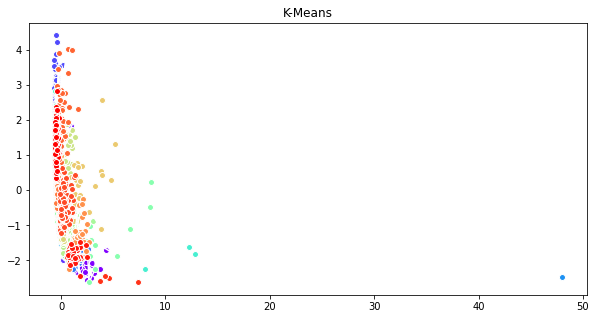

In [ ]:
if __name__ == '__main__':
    do_web_crawling()
    # story_clustering = do_tokenize_and_vectorize()
    # do_clustering_by_story(story_clustering, k_for_total=64)
    do_clustering_by_style(k=32, style_train_n=256, svd_n=0, clustering_type=2)
    # ut.make_csv(cluster_csv_filename, td.total_data)
    # ut.make_csv(cluster_detail_csv_filename, td.cluster_details)

# 깃허브 관련

취소 관련   
https://gmlwjd9405.github.io/2018/05/25/git-add-cancle.html

In [ ]:
cd /content/drive/MyDrive/Colab\ Notebooks/Github/IndividualProject-webtoonRecommendation/DeveloperAcademy-NC2-WebtoonRecommendation/MachineLearning

/content/drive/MyDrive/Colab Notebooks/Github/IndividualProject-webtoonRecommendation/DeveloperAcademy-NC2-WebtoonRecommendation/MachineLearning


In [ ]:
!git config --global user.email "lightcloud98@gmail.com"
!git config --global user.name "ddophi98"

In [ ]:
!git checkout machineLearning

M	MachineLearning/WentoonRecommendML.ipynb
Already on 'machineLearning'
Your branch is up to date with 'origin/machineLearning'.


In [ ]:
!git add WentoonRecommendML.ipynb

In [ ]:
!git status

On branch machineLearning
Your branch is up to date with 'origin/machineLearning'.

Changes to be committed:
  (use "git reset HEAD <file>..." to unstage)

	modified:   WentoonRecommendML.ipynb



In [ ]:
!git commit -m "haralick을 사용하여 비슷한 이미지 분류"

[machineLearning c7a342c] haralick을 사용하여 비슷한 이미지 분류
 1 file changed, 1 insertion(+), 1 deletion(-)
 rewrite MachineLearning/WentoonRecommendML.ipynb (88%)


In [ ]:
!git log

In [ ]:
!git push -u origin

Counting objects: 4, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 619.56 KiB | 9.39 MiB/s, done.
Total 4 (delta 1), reused 0 (delta 0)
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/ddophi98/DeveloperAcademy-NC2-WebtoonRecommendation
   db50651..c7a342c  machineLearning -> machineLearning
Branch 'machineLearning' set up to track remote branch 'machineLearning' from 'origin'.
